In [135]:
import pandas as pd
import os
from tqdm.notebook import tqdm

from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
%matplotlib inline

## Read COVID-19 data

In [136]:
covid_df = pd.read_csv(os.path.join('raw_data','owid-covid-data.csv'), parse_dates=['date'])
#Change names to merge dataframes later
covid_df = covid_df.replace('United States', 'USA')
covid_df = covid_df.replace('United Kingdom', 'UnitedKingdom')
covid_df = covid_df.replace('Czechia', 'CzechRepublic')
covid_df = covid_df.replace('Colombia', 'Columbia')
covid_df = covid_df.replace('Dominican Republic', 'DominicanRepublic')
covid_df = covid_df.replace('Luxembourg', 'Luxemborg')
covid_df = covid_df.replace('Hong Kong', 'HongKong')
covid_df = covid_df.replace('El Salvador', 'ElSalvador')
covid_df = covid_df.replace('New Zealand', 'NewZealand')
covid_df = covid_df.replace('Costa Rica', 'CostaRica')

covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [137]:
covid_df[covid_df['location'].str.contains('Rica')]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
34239,CRI,North America,CostaRica,2020-03-06,1.0,1.0,NaN,NaN,NaN,NaN,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
34240,CRI,North America,CostaRica,2020-03-07,1.0,0.0,NaN,NaN,NaN,NaN,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
34241,CRI,North America,CostaRica,2020-03-08,5.0,4.0,NaN,NaN,NaN,NaN,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
34242,CRI,North America,CostaRica,2020-03-09,9.0,4.0,NaN,NaN,NaN,NaN,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
34243,CRI,North America,CostaRica,2020-03-10,9.0,0.0,NaN,NaN,NaN,NaN,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34954,CRI,North America,CostaRica,2022-02-19,783437.0,0.0,3763.429,7894.0,0.0,17.429,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
34955,CRI,North America,CostaRica,2022-02-20,783437.0,0.0,3763.429,7894.0,0.0,17.429,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
34956,CRI,North America,CostaRica,2022-02-21,790444.0,7007.0,3417.714,7936.0,42.0,18.571,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
34957,CRI,North America,CostaRica,2022-02-22,793835.0,3391.0,3258.286,7954.0,18.0,17.857,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN


In [138]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164015 entries, 0 to 164014
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    164015 non-null  object        
 1   continent                                   154189 non-null  object        
 2   location                                    164015 non-null  object        
 3   date                                        164015 non-null  datetime64[ns]
 4   total_cases                                 161010 non-null  float64       
 5   new_cases                                   160981 non-null  float64       
 6   new_cases_smoothed                          159830 non-null  float64       
 7   total_deaths                                143260 non-null  float64       
 8   new_deaths                                  143436 non-null  float64      

In [139]:
covid_lite_df= covid_df['location date new_cases_smoothed new_cases_smoothed_per_million'.split()]

In [140]:
covid_lite_df.head()

,location,date,new_cases_smoothed,new_cases_smoothed_per_million
0,Afghanistan,2020-02-24,NaN,NaN
1,Afghanistan,2020-02-25,NaN,NaN
2,Afghanistan,2020-02-26,NaN,NaN
3,Afghanistan,2020-02-27,NaN,NaN
4,Afghanistan,2020-02-28,NaN,NaN


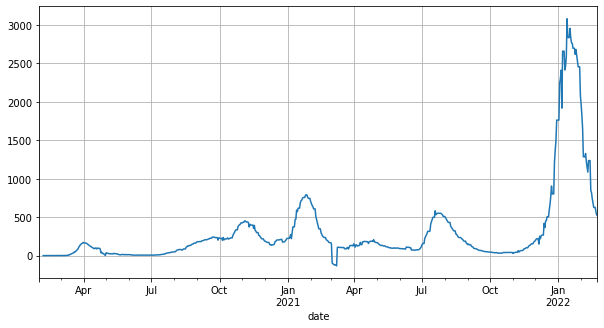

In [141]:
country_covid_ts= covid_lite_df[covid_lite_df['location']=='Spain'].set_index('date');
country_covid_ts['new_cases_smoothed_per_million'].plot(grid=True, figsize=(10,5));

In [142]:
covid_lite_df['date'].min()

Timestamp('2020-01-01 00:00:00')

### Read songs' features

In [143]:
mood_features= 'danceability valence energy'.split()

In [144]:
ranking_features_df= pd.read_csv(os.path.join('generated_data', 'ranking_features.csv'), index_col=0, parse_dates=['Date', 'release_date'])

/home/fterroso/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


We just kept records from the first date with covid-19 cases

In [145]:
ranking_features_df= ranking_features_df[ranking_features_df['Date']>='2020-01-01']

### Remove Christmas carols as we consider them outliers

In [146]:
christmas_songs_df= ranking_features_df[(((ranking_features_df['Date'].dt.month==12) &
                                        (ranking_features_df['Date'].dt.day>=23)) |
                                        ((ranking_features_df['Date'].dt.month==1) & 
                                        (ranking_features_df['Date'].dt.day<=1)))& 
                                        (ranking_features_df['danceability']<=0.66) &
                                       (ranking_features_df['energy']<=0.60) &
                                       (ranking_features_df['valence']>=0.56)]
outliers_names= christmas_songs_df['Track Name'].unique()                    

ranking_features_df= ranking_features_df[~ranking_features_df['Track Name'].isin(outliers_names)]

In [147]:
ranking_features_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date,danceability,valence,energy,id
24932,153,Criminal,"Natti Natasha, Ozuna",29977,6Za3190Sbw39BBC77WSS1C,2020-02-29,Chile,6Za3190Sbw39BBC77WSS1C,2017-11-10,0.814,0.839,0.813,6Za3190Sbw39BBC77WSS1C
24933,182,Criminal,"Natti Natasha, Ozuna",23824,6Za3190Sbw39BBC77WSS1C,2020-03-01,Chile,6Za3190Sbw39BBC77WSS1C,2017-11-10,0.814,0.839,0.813,6Za3190Sbw39BBC77WSS1C
45780,96,Robarte un Beso,"Carlos Vives, Sebastian Yatra",5873,0JcNysfWVWaMS7R6vzGB2k,2020-01-01,Ecuador,0JcNysfWVWaMS7R6vzGB2k,2017-11-10,0.742,0.652,0.859,0JcNysfWVWaMS7R6vzGB2k
45781,151,Robarte un Beso,"Carlos Vives, Sebastian Yatra",4643,0JcNysfWVWaMS7R6vzGB2k,2020-01-02,Ecuador,0JcNysfWVWaMS7R6vzGB2k,2017-11-10,0.742,0.652,0.859,0JcNysfWVWaMS7R6vzGB2k
45782,167,Robarte un Beso,"Carlos Vives, Sebastian Yatra",4686,0JcNysfWVWaMS7R6vzGB2k,2020-01-03,Ecuador,0JcNysfWVWaMS7R6vzGB2k,2017-11-10,0.742,0.652,0.859,0JcNysfWVWaMS7R6vzGB2k


In [148]:
continents = {}
continents['europe']=['Portugal', 'Italy', 'Germany', 'Finland', 'Estonia', 'Hungary', 
                      'Spain', 'Slovakia', 'Ireland', 'Iceland', 'France',  'Norway', 
                      'Lithuania', 'Turkey', 'Switzerland', 'Belgium', 'Denmark',  
                      'Poland', 'Austria', 'Sweden', 'CzechRepublic', 'Netherlands',
                      'UnitedKingdom',  'Latvia', 'Greece', 'Luxemborg']
continents['north_america']= 'USA Canada'.split()
continents['south_america']=['Ecuador', 'Panama', 'Peru',  'Uruguay', 'CostaRica',
                            'Mexico', 'Argentina', 'ElSalvador', 'Chile', 'Brazil', 
                            'Honduras', 'Guatemala','Bolivia', 'Columbia','DominicanRepublic', 'Paraguay']
continents['oceania']='Australia NewZealand'.split()
continents['asia']= ['Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Japan', 'Singapore', 'HongKong']

In [149]:
ranking_features_df['Region'].unique()

array(['Chile', 'Ecuador', 'Panama', 'Peru', 'CostaRica', 'Bolivia',
       'Columbia', 'DominicanRepublic', 'Portugal', 'Finland', 'Hungary',
       'Ireland', 'Brazil', 'Canada', 'Belgium', 'Uruguay', 'Malaysia',
       'Mexico', 'Taiwan', 'USA', 'Norway', 'Switzerland', 'Australia',
       'NewZealand', 'Netherlands', 'Austria', 'CzechRepublic',
       'Argentina', 'Singapore', 'UnitedKingdom', 'Guatemala',
       'Philippines', 'France', 'Honduras', 'Japan', 'World', 'Sweden',
       'ElSalvador', 'HongKong', 'Poland', 'Denmark', 'Germany',
       'Paraguay', 'Slovakia', 'Indonesia', 'Spain', 'Iceland',
       'Lithuania', 'Latvia', 'Luxemborg', 'Italy', 'Greece', 'Estonia',
       'Turkey'], dtype=object)

In [150]:
ranking_features_df['Date'].min(), ranking_features_df['Date'].max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2022-02-22 00:00:00'))

In [151]:
def plot_covid_song_features(song_feat_df, covid_df, country_lst, features):
    country_covid_ts= covid_lite_df[covid_lite_df['location'].isin(country_lst)].set_index('date');
    
    country_df = ranking_features_df[ranking_features_df['Region'].isin(country_lst)]
    daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
                                    
    f, axes = plt.subplots(len(features), 1, figsize=(20,15), sharey='row', sharex='col')
    axe = axes.ravel()
    i=0
    for c in features:
        df = daily_country_df[c].to_frame()
        df['covid_cases']= country_covid_ts['new_cases_smoothed_per_million']
       
        ax2 = axe[i].twinx()
                                     
        corr_= df.dropna().corr().loc[c,'covid_cases']                             
                                     
        df[c].plot(ax=axe[i], color='blue', title=f'Country: {country_lst}. Feature: {c}. Corr: {corr_}');
        df['covid_cases'].plot(ax=ax2, grid=True, color='red');  
        
        i= i+1


def plot_covid_and_song_feature(song_feat_df, covid_df, country_lst, feature, show_trend=False):
    
    country_covid_ts= covid_lite_df[covid_lite_df['location'].isin(country_lst)].set_index('date');

    country_df = song_feat_df[song_feat_df['Region'].isin(country_lst)]
    daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
                                    
    f, ax = plt.subplots(1, 1, figsize=(10,4), sharey='row', sharex='col')
    df = daily_country_df[feature].to_frame()
    
    if show_trend:
        df = seasonal_decompose(df, model='additive', period=7).trend.to_frame();
        feature='trend'
            
    df['covid_19']= country_covid_ts['new_cases_smoothed_per_million']
       
    ax2 = ax.twinx()
    
    ax.set_xlabel('Time', fontsize=16)
    ax.set_ylabel(f'{feature}', fontsize=16, color='blue')
    ax.tick_params(axis='y', colors='blue')
    

    ax2.set_ylabel('COVID-19 cases per mill.', fontsize=16, color='red')    
    ax2.tick_params(axis='y', colors='red')
    
    df[feature].plot(ax=ax, color='blue');
    df['covid_19'].plot(ax=ax2, grid=True, color='red');
    plt.tight_layout()
    if show_trend:
        plt.savefig(os.path.join('figs','covid_vs_{}_{}_trend.png'.format(feature, '_'.join(country_lst))))
    else:
        plt.savefig(os.path.join('figs','covid_vs_{}_{}.png'.format(feature, '_'.join(country_lst))))
        

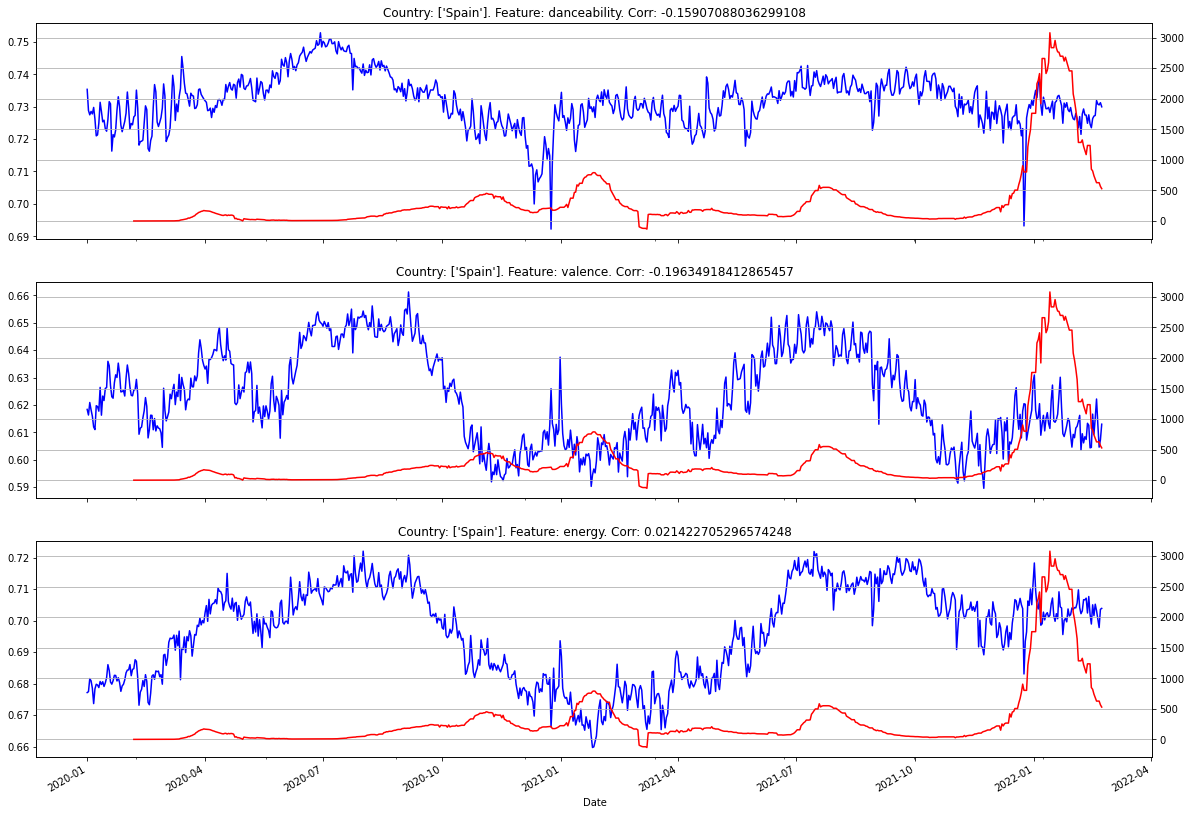

In [152]:
plot_covid_song_features(ranking_features_df, covid_lite_df, ['Spain'], mood_features)

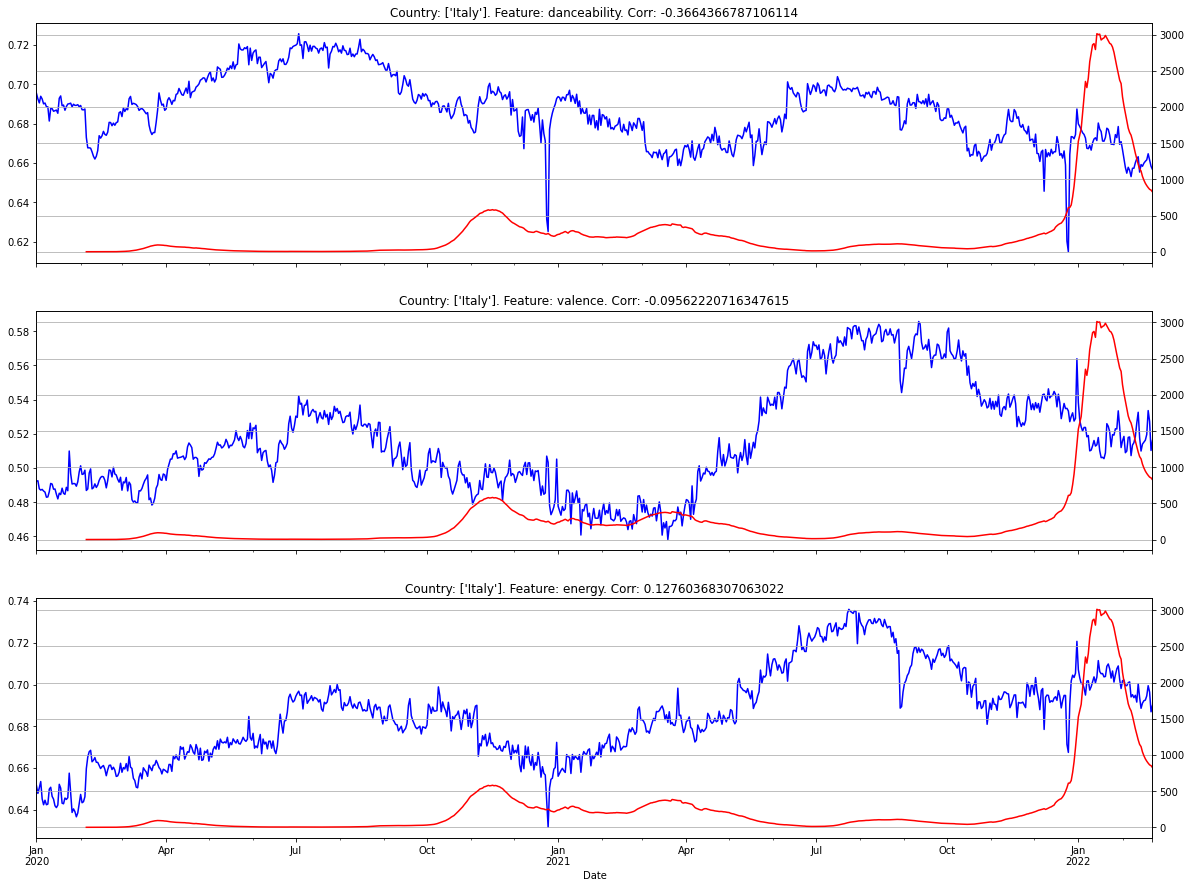

In [153]:
plot_covid_song_features(ranking_features_df, covid_lite_df, ['Italy'], mood_features)

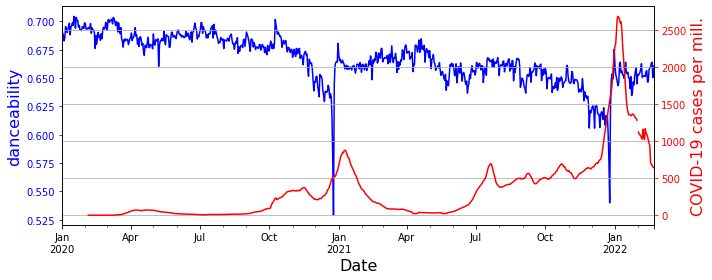

In [154]:
plot_covid_and_song_feature(ranking_features_df, covid_lite_df, ['UnitedKingdom'], 'danceability')

## PCC

In [155]:
def compute_corelations(song_feat_df, covid_df, features, countries_lst):

    corr_dict = []

    for c in tqdm(countries_lst, desc='Country'):
        f_dict= {} 
        f_dict['country']=c
        
        country_covid_ts= covid_df[covid_df['location']==c].set_index('date')  
        
        country_df = song_feat_df[song_feat_df['Region']==c]
        daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
        
        for f in features:      
            
            df = daily_country_df[f].to_frame()
            df['covid_cases']= country_covid_ts['new_cases_smoothed_per_million']

            corr_= df.dropna().corr().loc[f,'covid_cases']                             
            f_dict[f]= corr_
        corr_dict.append(f_dict)
    
    return pd.DataFrame(corr_dict)
        
all_corr_df= compute_corelations(ranking_features_df, 
                                 covid_lite_df, 
                                 mood_features, 
                                 ranking_features_df['Region'].unique())        

Country:   0%|          | 0/54 [00:00<?, ?it/s]

In [156]:
all_corr_df.describe()

,danceability,valence,energy
count,54.000000,54.000000,54.000000
mean,-0.263390,-0.048566,0.081628
std,0.180321,0.209230,0.233133
min,-0.545045,-0.551399,-0.428060
25%,-0.399785,-0.180907,-0.083471
50%,-0.263760,-0.061958,0.082555
75%,-0.155999,0.110907,0.246858
max,0.274160,0.438435,0.590472


In [157]:
all_corr_df.sort_values(by='danceability', ascending=False)

,country,danceability,valence,energy
12,Brazil,0.274160,0.231569,-0.130810
34,Japan,0.210062,0.145642,-0.023914
0,Chile,0.010484,-0.131992,-0.144853
33,Honduras,0.001860,0.256131,0.113395
46,Iceland,0.000756,-0.001717,-0.091149
37,ElSalvador,-0.028036,-0.288541,-0.083755
36,Sweden,-0.065470,0.038714,-0.082618
38,HongKong,-0.090526,0.008439,0.051064
10,Hungary,-0.095022,0.113804,0.036661
23,NewZealand,-0.136526,0.126904,0.379528


In [158]:
all_corr_df.sort_values(by='valence', ascending=False)

,country,danceability,valence,energy
16,Malaysia,-0.362165,0.438435,0.590472
22,Australia,-0.197312,0.361974,0.532109
33,Honduras,0.001860,0.256131,0.113395
24,Netherlands,-0.142642,0.255077,0.045249
12,Brazil,0.274160,0.231569,-0.130810
28,Singapore,-0.206792,0.218542,0.377131
51,Greece,-0.386006,0.193908,0.550262
8,Portugal,-0.319223,0.173097,0.318875
34,Japan,0.210062,0.145642,-0.023914
27,Argentina,-0.196964,0.133780,0.181046


In [159]:
all_corr_df.sort_values(by='energy', ascending=False)

,country,danceability,valence,energy
16,Malaysia,-0.362165,0.438435,0.590472
51,Greece,-0.386006,0.193908,0.550262
22,Australia,-0.197312,0.361974,0.532109
35,World,-0.543861,-0.144503,0.523309
48,Latvia,-0.329218,-0.289859,0.398443
23,NewZealand,-0.136526,0.126904,0.379528
28,Singapore,-0.206792,0.218542,0.377131
52,Estonia,-0.528797,-0.551399,0.368781
8,Portugal,-0.319223,0.173097,0.318875
49,Luxemborg,-0.254749,0.063367,0.314909


### Compute trend-based PCC

In [160]:
def compute_trend_based_correlations(song_feat_df, covid_df, features, countries_lst):

    corr_dict = []

    for c in tqdm(countries_lst, desc='Country'):
        f_dict= {} 
        f_dict['country']=c
        
        country_covid_ts= covid_df[covid_df['location']==c].set_index('date')  
        
        country_df = song_feat_df[song_feat_df['Region']==c]
        daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
        
        for f in features:  
            
            country_f_decomposition = seasonal_decompose(daily_country_df[f], model='additive', period=7);

            df = country_f_decomposition.trend.to_frame()
            df['covid_cases']= country_covid_ts['new_cases_smoothed_per_million']

            corr_= df.dropna().corr().loc['trend','covid_cases']                             
            f_dict[f]= corr_
        corr_dict.append(f_dict)
    
    return pd.DataFrame(corr_dict)

all_trend_corr_df= compute_trend_based_correlations(ranking_features_df, 
                                              covid_lite_df, 
                                              mood_features, 
                                              ranking_features_df['Region'].unique())         

Country:   0%|          | 0/54 [00:00<?, ?it/s]

In [161]:
all_trend_corr_df.sort_values(by='danceability', ascending=False)['country danceability'.split()]

,country,danceability
12,Brazil,0.304338
34,Japan,0.212963
33,Honduras,0.028206
0,Chile,-0.003474
46,Iceland,-0.007367
37,ElSalvador,-0.022221
36,Sweden,-0.071064
38,HongKong,-0.107949
10,Hungary,-0.113466
3,Peru,-0.153540


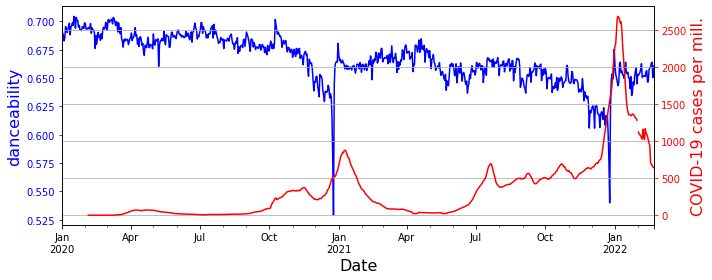

In [162]:
plot_covid_and_song_feature(ranking_features_df, covid_lite_df, ['UnitedKingdom'], 'danceability', show_trend=False)

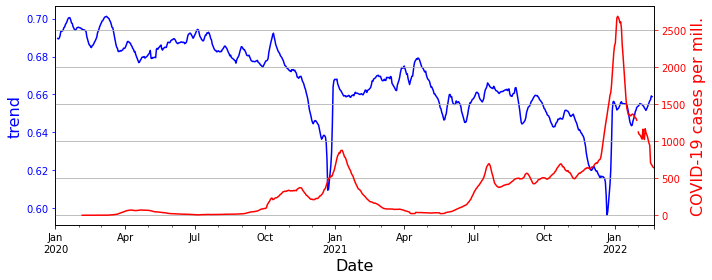

In [163]:
plot_covid_and_song_feature(ranking_features_df, covid_lite_df, ['UnitedKingdom'], 'danceability', show_trend=True)

In [164]:
all_trend_corr_df.sort_values(by='valence', ascending=False)['country valence'.split()]

,country,valence
16,Malaysia,0.479921
22,Australia,0.438384
33,Honduras,0.352743
12,Brazil,0.291948
24,Netherlands,0.288343
28,Singapore,0.274851
51,Greece,0.201986
23,NewZealand,0.184465
27,Argentina,0.176458
8,Portugal,0.174796


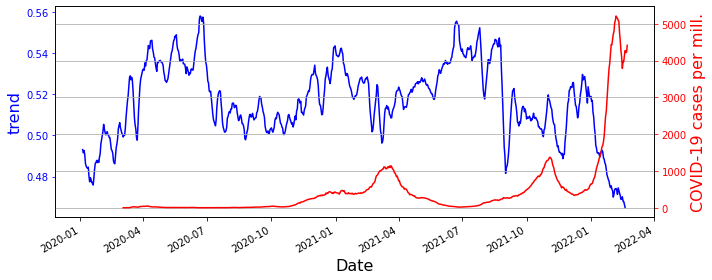

In [165]:
plot_covid_and_song_feature(ranking_features_df, covid_lite_df, ['Estonia'], 'valence', show_trend=True)

In [166]:
all_trend_corr_df.sort_values(by='energy', ascending=False)['country energy'.split()]

,country,energy
16,Malaysia,0.638232
35,World,0.595198
22,Australia,0.562210
51,Greece,0.552091
23,NewZealand,0.458889
48,Latvia,0.416378
28,Singapore,0.409294
52,Estonia,0.386221
49,Luxemborg,0.361115
8,Portugal,0.331343


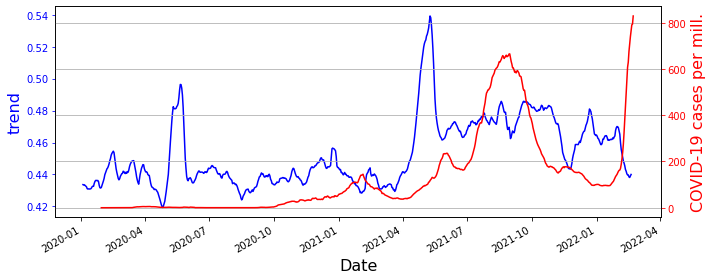

In [167]:
plot_covid_and_song_feature(ranking_features_df, covid_lite_df, ['Malaysia'], 'valence', show_trend=True)

### Study correlation of shifted timeseries

In [220]:
fdf= ranking_features_df.drop(columns='Position Streams'.split()).groupby('Region Date'.split()).mean()
countries_lst= ranking_features_df['Region'].unique()
corr_lst=[]
max_days_to_shift=31
for c in tqdm(countries_lst, desc='Country'):

        
        country_covid_ts= covid_lite_df[covid_lite_df['location']==c].dropna(axis=0).set_index('date')
 
        #country_df = song_feat_df[song_feat_df['Region']==c]
        #daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
        
        for f in mood_features:  
            
            f_dict= {} 
            f_dict['country']=c
            f_dict['feature']=f
            
            country_f_decomposition = seasonal_decompose(fdf.loc[c][f], model='additive', period=7);
            df = country_f_decomposition.trend
            
            df=df[country_covid_ts.index[0]:country_covid_ts.index[-1]].to_frame()
            df['covid_19']=country_covid_ts['new_cases_smoothed_per_million']
            
            for days_to_shift in range(0,max_days_to_shift):
                b= df.copy()
                #b[f]= df['trend'].shift(days_to_shift)
                b['covid_19']= b['covid_19'].shift(days_to_shift)
                b= b.dropna(axis=0)
                corr_= b.corr()
                f_dict[days_to_shift]=corr_.loc['trend', 'covid_19']
            corr_lst.append(f_dict)



Country:   0%|          | 0/54 [00:00<?, ?it/s]

In [221]:
shift_corr_df= pd.DataFrame.from_dict(corr_lst)
shift_corr_df

,country,feature,0,1,2,3,4,5,6,7,...,21,22,23,24,25,26,27,28,29,30
0,Chile,danceability,-0.003474,-0.011042,-0.018506,-0.025819,-0.032719,-0.039487,-0.046285,-0.053319,...,-0.213092,-0.230157,-0.246070,-0.261304,-0.275460,-0.288546,-0.300238,-0.310908,-0.321161,-0.331102
1,Chile,valence,-0.163780,-0.168436,-0.173140,-0.177857,-0.182265,-0.186562,-0.191126,-0.195744,...,-0.265702,-0.268384,-0.269269,-0.268508,-0.266096,-0.261929,-0.256293,-0.249364,-0.241399,-0.232366
2,Chile,energy,-0.177615,-0.185475,-0.193259,-0.201231,-0.209186,-0.217485,-0.226303,-0.235742,...,-0.442162,-0.459479,-0.474439,-0.487742,-0.499236,-0.509414,-0.518057,-0.524796,-0.530626,-0.535326
3,Ecuador,danceability,-0.387486,-0.381282,-0.375056,-0.368321,-0.360855,-0.353189,-0.345943,-0.340996,...,-0.264381,-0.257651,-0.251151,-0.245026,-0.239180,-0.233022,-0.226749,-0.221010,-0.215633,-0.210107
4,Ecuador,valence,-0.479189,-0.473264,-0.467487,-0.461405,-0.453915,-0.446099,-0.438548,-0.434767,...,-0.293556,-0.280321,-0.266798,-0.253923,-0.241388,-0.227544,-0.213150,-0.198620,-0.183569,-0.167226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Estonia,valence,-0.618097,-0.617027,-0.615691,-0.614241,-0.611965,-0.609142,-0.605681,-0.601616,...,-0.528349,-0.518853,-0.507128,-0.493945,-0.479096,-0.462804,-0.445313,-0.427278,-0.408730,-0.390425
158,Estonia,energy,0.386221,0.382571,0.378574,0.374133,0.369478,0.364484,0.359335,0.354006,...,0.285807,0.282254,0.278930,0.276089,0.273406,0.270654,0.267872,0.264853,0.262119,0.259503
159,Turkey,danceability,-0.557194,-0.555384,-0.553916,-0.552772,-0.551884,-0.551289,-0.551104,-0.551246,...,-0.568883,-0.569132,-0.568928,-0.568360,-0.567688,-0.567164,-0.566740,-0.566548,-0.566478,-0.566609
160,Turkey,valence,-0.181325,-0.187390,-0.193353,-0.199222,-0.204792,-0.210072,-0.215035,-0.219686,...,-0.233742,-0.230620,-0.226909,-0.222669,-0.218065,-0.213731,-0.209456,-0.205285,-0.201277,-0.197561


In [248]:
def plot_shift_correlation(df, feature, days_to_show=max_days_to_shift):
    ax=df[df['feature']==feature][range(0,days_to_show)].mean(axis=0).plot(grid=True);
    ax.set_xlabel('Days to shift', fontsize=16);
    ax.set_ylabel(feature, fontsize=16);  
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.savefig(os.path.join('figs',f'shift_pcc_{feature}.png'),bbox_inches='tight')

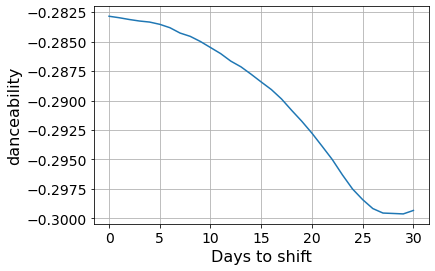

In [249]:
plot_shift_correlation(shift_corr_df, 'danceability')

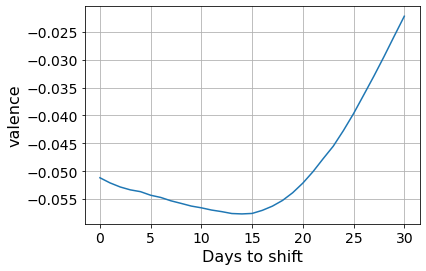

In [250]:
plot_shift_correlation(shift_corr_df, 'valence')

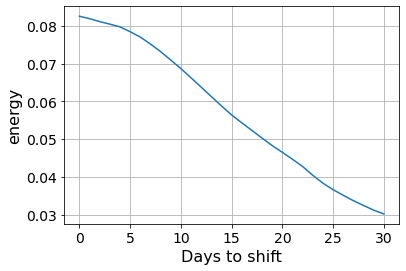

In [251]:
plot_shift_correlation(shift_corr_df, 'energy')

In [169]:
fdf= ranking_features_df.drop(columns='Position Streams'.split()).groupby('Region Date'.split()).mean()

In [181]:
fdf

danceability   valence    energy
Region    Date                                        
Argentina 2020-01-01      0.724020  0.715274  0.715731
          2020-01-02      0.726194  0.645768  0.681872
          2020-01-03      0.731000  0.648358  0.687508
          2020-01-04      0.729589  0.652081  0.690904
          2020-01-05      0.723451  0.658708  0.695015
...                            ...       ...       ...
World     2022-02-18      0.658187  0.500228  0.658823
          2022-02-19      0.664909  0.523284  0.670859
          2022-02-20      0.654141  0.501218  0.656379
          2022-02-21      0.651444  0.487765  0.645687
          2022-02-22      0.651419  0.488553  0.648874

[42169 rows x 3 columns]

In [170]:
covid_lite_df

,location,date,new_cases_smoothed,new_cases_smoothed_per_million
0,Afghanistan,2020-02-24,NaN,NaN
1,Afghanistan,2020-02-25,NaN,NaN
2,Afghanistan,2020-02-26,NaN,NaN
3,Afghanistan,2020-02-27,NaN,NaN
4,Afghanistan,2020-02-28,NaN,NaN
...,...,...,...,...
164010,Zimbabwe,2022-02-19,275.000,18.221
164011,Zimbabwe,2022-02-20,281.571,18.657
164012,Zimbabwe,2022-02-21,281.143,18.628
164013,Zimbabwe,2022-02-22,339.571,22.500


In [171]:
cdf=covid_lite_df[covid_lite_df['location']=='Argentina'].dropna(axis=0).set_index('date')
cdf

,location,new_cases_smoothed,new_cases_smoothed_per_million
date,,,
2020-03-08,Argentina,1.714,0.038
2020-03-09,Argentina,1.714,0.038
2020-03-10,Argentina,2.286,0.050
2020-03-11,Argentina,2.571,0.056
2020-03-12,Argentina,2.571,0.056
...,...,...,...
2022-02-19,Argentina,13541.714,296.930
2022-02-20,Argentina,13279.000,291.169
2022-02-21,Argentina,13010.429,285.280


In [172]:
a=fdf.loc['Argentina']['valence']
a

Date
2020-01-01    0.715274
2020-01-02    0.645768
2020-01-03    0.648358
2020-01-04    0.652081
2020-01-05    0.658708
                ...   
2022-02-18    0.646162
2022-02-19    0.645464
2022-02-20    0.649469
2022-02-21    0.640096
2022-02-22    0.638086
Name: valence, Length: 783, dtype: float64

In [173]:
a=a[cdf.index[0]:cdf.index[-1]].to_frame()
a

,valence
Date,
2020-03-08,0.652249
2020-03-09,0.641919
2020-03-10,0.640056
2020-03-11,0.643944
2020-03-12,0.643025
...,...
2022-02-18,0.646162
2022-02-19,0.645464
2022-02-20,0.649469


In [174]:
cdf

,location,new_cases_smoothed,new_cases_smoothed_per_million
date,,,
2020-03-08,Argentina,1.714,0.038
2020-03-09,Argentina,1.714,0.038
2020-03-10,Argentina,2.286,0.050
2020-03-11,Argentina,2.571,0.056
2020-03-12,Argentina,2.571,0.056
...,...,...,...
2022-02-19,Argentina,13541.714,296.930
2022-02-20,Argentina,13279.000,291.169
2022-02-21,Argentina,13010.429,285.280


In [175]:
a['covid_19']=cdf['new_cases_smoothed_per_million']

In [176]:
a

,valence,covid_19
Date,,
2020-03-08,0.652249,0.038
2020-03-09,0.641919,0.038
2020-03-10,0.640056,0.050
2020-03-11,0.643944,0.056
2020-03-12,0.643025,0.056
...,...,...
2022-02-18,0.646162,307.940
2022-02-19,0.645464,296.930
2022-02-20,0.649469,291.169


In [177]:
b= a.copy()
b['valence']= a.shift(1)
b= b.dropna(axis=0)

In [178]:
b

,valence,covid_19
Date,,
2020-03-09,0.652249,0.038
2020-03-10,0.641919,0.050
2020-03-11,0.640056,0.056
2020-03-12,0.643944,0.056
2020-03-13,0.643025,0.091
...,...,...
2022-02-18,0.648786,307.940
2022-02-19,0.646162,296.930
2022-02-20,0.645464,291.169


In [179]:
b.corr()

,valence,covid_19
valence,1.000000,0.134112
covid_19,0.134112,1.000000


In [180]:
for days_to_shift in range(1,31):
    b= a.copy()
    b['valence']= a.shift(days_to_shift)
    b= b.dropna(axis=0)
    corr_= b.corr()
    print(days_to_shift, corr_.loc['valence', 'covid_19'])

1 0.13411163690932654
2 0.13583635512518666
3 0.13980243889974078
4 0.144502810406088
5 0.15008932928624538
6 0.15603754720902738
7 0.161731426850946
8 0.16634163798700957
9 0.1703238288106807
10 0.17525709416885188
11 0.17992017718875136
12 0.1838014023165625
13 0.1878907661087405
14 0.19116566942053947
15 0.19266977250840864
16 0.19471785103586475
17 0.19570413045376064
18 0.19624694483125962
19 0.19575133760866528
20 0.1940300037607868
21 0.19146680886140083
22 0.1888889498485115
23 0.1861164398993042
24 0.18227363730226107
25 0.1770883591934415
26 0.17142162020948012
27 0.164599902399539
28 0.15822944479571682
29 0.15264258667630634
30 0.1467476135385023


### Plot as maps

In [ ]:
import geopandas as gpd
from matplotlib.colors import TwoSlopeNorm

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#correct some name inconsistences
world.loc[4,'name']='USA'
world.loc[143,'name']='UnitedKingdom'
world.loc[17,'name']='DominicanRepublic'
world.loc[153,'name']='CzechRepublic'
world.loc[37,'name']='ElSalvador'
world.loc[136,'name']='NewZealand'
world.loc[34,'name']='CostaRica'
world.loc[128,'name']='Luxemborg'

world.head()

In [ ]:
world_with_values= world.merge(all_trend_corr_df, left_on='name', right_on='country')

In [ ]:
def plot_normalized_map(world_gdf, df, column):
    # normalize color
    vmin, vmax, vcenter = df[column].min(), df[column].max(), 0
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    # create a normalized colorbar
    cmap = 'coolwarm'

    ax=df.plot(column=column, legend=True, figsize=(15,7), cmap=cmap,norm=norm,legend_kwds={'shrink': 0.4});
    world_gdf.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black');
    ax.set_axis_off();
    plt.tight_layout()
    plt.savefig(os.path.join('figs',f'pcc_covid_{column}_map_v2.png'))

In [ ]:
plot_normalized_map(world, world_with_values, 'danceability')

In [ ]:
plot_normalized_map(world, world_with_values, 'valence')

In [ ]:
plot_normalized_map(world, world_with_values, 'energy')

In [ ]:
print("That's all folks!")